# Import Libraries & Load Dataset

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset using the full path
df = pd.read_csv(r"C:\Users\arunj\Downloads\myexcel - myexcel.csv.csv")

df.head()



,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [5]:

df["height"] = np.random.randint(150, 181, size=len(df))
df["height"].head()


0    151
1    155
2    154
3    153
4    154
Name: height, dtype: int32

# 1: Distribution of Employees Across Teams

In [12]:

print(df.columns)  # Check the column names in the dataset
df.columns = df.columns.str.strip()
team_counts = df['Team'].value_counts()  # Ensure 'Team' is the correct column name
team_percent = (team_counts / len(df)) * 100
print("\nTeam Distribution (Count):")
print(team_counts)

print("\nPercentage Distribution:")
print(team_percent)


Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary', 'height'],
      dtype='object')

Team Distribution (Count):
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic         

# 2. Segregate employees based on their positions 

In [14]:
print(df.columns)  # Check the column names in the dataset
df.columns = df.columns.str.strip()
position_counts = df['Position'].value_counts()  # Ensure 'Position' is the correct column name

position_percent = (position_counts / len(df)) * 100
print("\nEmployee Distribution by Position (Count):")
print(position_counts)

print("\nPercentage Distribution by Position:")
print(position_percent)


Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary', 'height'],
      dtype='object')

Employee Distribution by Position (Count):
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

Percentage Distribution by Position:
Position
SG    22.270742
PF    21.834061
PG    20.087336
SF    18.558952
C     17.248908
Name: count, dtype: float64


# 3. Identify the predominant age group among employees.

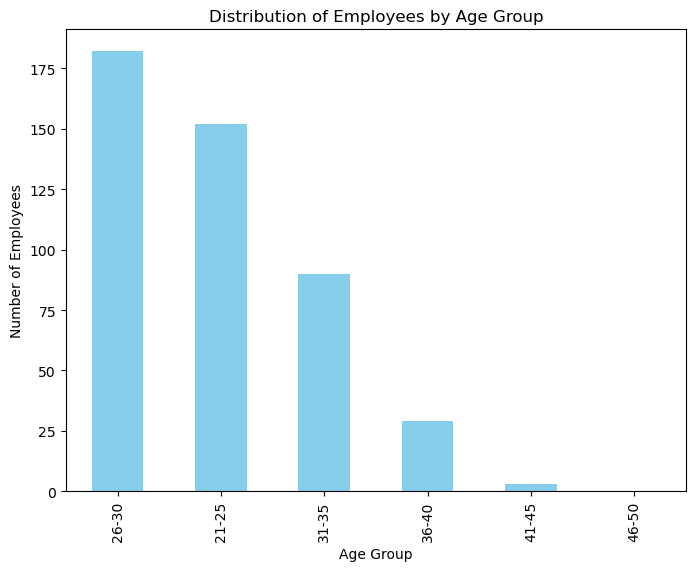


Predominant Age Group (Count):
Age Group
26-30    182
21-25    152
31-35     90
36-40     29
41-45      3
46-50      0
Name: count, dtype: int64


In [16]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

age_bins = [20, 25, 30, 35, 40, 45, 50]
age_labels = ['21-25', '26-30', '31-35', '36-40', '41-45', '46-50']

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = df['Age Group'].value_counts()

plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')

plt.show()

print("\nPredominant Age Group (Count):")
print(age_group_counts)


# 4: Discover Which Team and Position Have the Highest Salary Expenditure

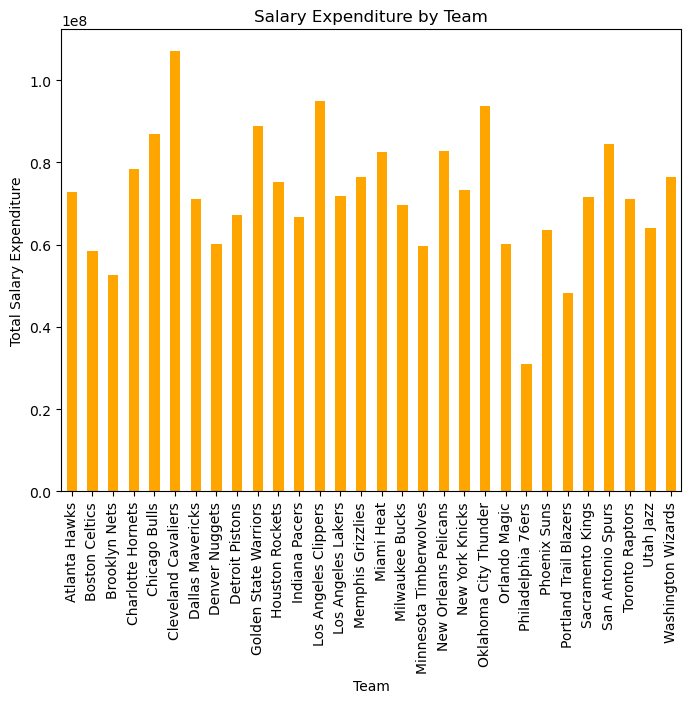

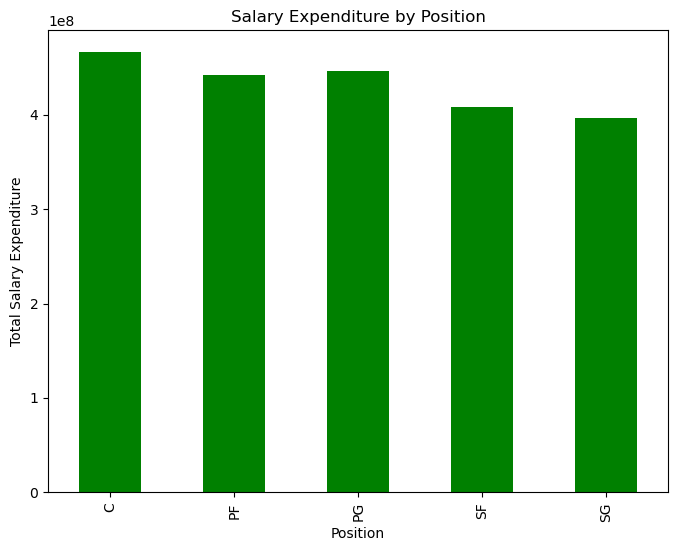


Team with the highest salary expenditure: Cleveland Cavaliers ($106,988,689.00)
Position with the highest salary expenditure: C ($466,377,332.00)


In [18]:

team_salary_expenditure = df.groupby('Team')['Salary'].sum()


position_salary_expenditure = df.groupby('Position')['Salary'].sum()


highest_team = team_salary_expenditure.idxmax()
highest_team_salary = team_salary_expenditure.max()


highest_position = position_salary_expenditure.idxmax()
highest_position_salary = position_salary_expenditure.max()

plt.figure(figsize=(8, 6))
team_salary_expenditure.plot(kind='bar', color='orange')
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')

plt.show()

plt.figure(figsize=(8, 6))
position_salary_expenditure.plot(kind='bar', color='green')
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')

plt.show()


print(f"\nTeam with the highest salary expenditure: {highest_team} (${highest_team_salary:,.2f})")
print(f"Position with the highest salary expenditure: {highest_position} (${highest_position_salary:,.2f})")


# Task 5: Investigate if There's Any Correlation Between Age and Salary, and Represent It Visually


Correlation between Age and Salary: 0.21


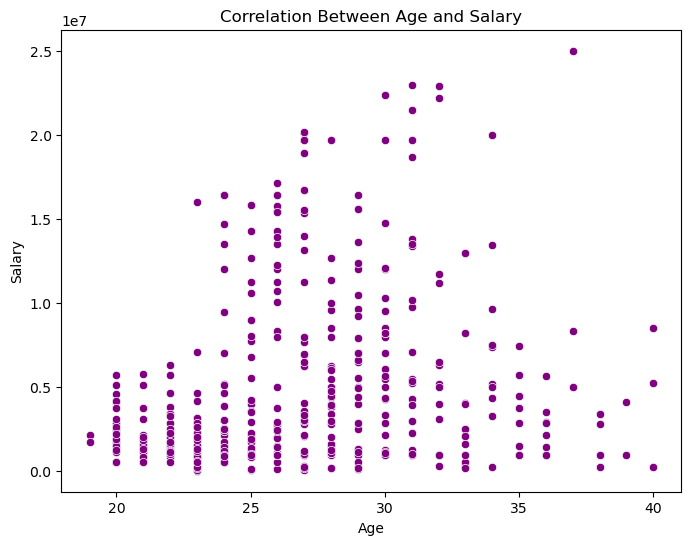

In [19]:

df_clean = df.dropna(subset=['Age', 'Salary'])


correlation = df_clean['Age'].corr(df_clean['Salary'])
print(f"\nCorrelation between Age and Salary: {correlation:.2f}")


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='Age', y='Salary', color='purple')
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')

plt.show()
